#### Nombre del Alumno:  Jonathan Cuevas Valencia   
#### Correo: jonathan.cuevas.valencia@intel.com


#### Explicación de los Datos:
**MiBici** es un servicio de transporte público en la Zona Metropolitana de Guadalajara, el cual está basado en una red de estaciones automáticas donde el usuario registrado puede tomar y/o dejar una bicicleta. El servicio está disponible todos los días, de las 6:00 a las 23:59 hrs.

<br>
<img src="./Imagenes/mibici_logo.png" style="width:268px;height:70px;" class="center">
<br>

El portal de **MiBici** contiene información detallada de los viajes realizados desde el año 2014 a la fecha, todo ello en archivos en formato `.CSV` separados por meses, los cuales pueden consultarse [en esta liga.](https://www.mibici.net/es/datos-abiertos)

Se desea realizar un análisis de los primeros seis meses de 2023, para ello se proporcionan los archivos en formato `.CSV`. Cada uno de ellos contiene las mismas columnas de información, y los datos se han limitado a 1,000 entradas en cada archivo para simplificar la cantidad de información disponible para esta evaluación.

Las columnas de información en cada uno de los archivos son:

1. **ID Viaje**: Es el número de identificación del viaje.
2. **ID Usuario**: Es el número de identificación del usuario.
3. **Género**: Es el género (*F/M*) del usuario.
4. **Año de Nacimiento**: Es el año de nacimiento del usuario.
5. **Fecha Inicio Viaje**: Es la fecha en la que se inició el viaje realizado.
6. **Hora Inicio Viaje**: Es la hora en la que se inició el viaje realizado.
7. **Fecha Fin Viaje**: Es la fecha en la que se concluyó el viaje realizado.
8. **Hora Fin Viaje**: Es la hora en la que se concluyó el viaje realizado.
9. **ID Origen**: Es el identificador de la estación desde donde se originó el viaje.
10. **ID Destino**: Es el identificador de la estación donde se concluyó el viaje.

Los archivos contenidos en el directorio `Datos` son:

* El archivo `2023_01.csv` corresponde al mes de enero de 2023.
* El archivo `2023_02.csv` corresponde al mes de febrero de 2023.
* El archivo `2023_03.csv` corresponde al mes de marzo de 2023.
* El archivo `2023_04.csv` corresponde al mes de abril de 2023.
* El archivo `2023_05.csv` corresponde al mes de mayo de 2023.
* El archivo `2023_06.csv` corresponde al mes de junio de 2023.
* El archivo `Estaciones.csv` corresponde al nombre de las Estaciones y su localización.



Comence cargando las librerías **Pandas**, **Numpy** y **Matplotlib**. Posteriormente, se creo un **DataFrame** donde se inserten a través de una concatenación los seis archivos `.CSV` de datos de **MiBici** correspondientes a los meses de enero a junio de 2023, mostrando el contenido del **DataFrame** final a través del método `.head()`.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Creación de una Lista
Mibici=['2023_01.csv','2023_02.csv','2023_03.csv','2023_04.csv','2023_05.csv','2023_06.csv']
lista = []
for num in Mibici:
    lista.append(pd.read_csv(f'./Datos/{num}', encoding='latin-1')) 
DataBici=pd.concat(lista,ignore_index=True)
print(DataBici.head())


   Viaje_Id  Usuario_Id Genero  Año_de_nacimiento     Inicio_del_viaje  \
0  26751198     1350606      M             1983.0  2023-01-01 00:00:41   
1  26751199       15163      M             1986.0  2023-01-01 00:04:48   
2  26751200     1534764      M             1987.0  2023-01-01 00:06:49   
3  26751201     1240140      M             1996.0  2023-01-01 00:08:05   
4  26751202     1732214      M             1969.0  2023-01-01 00:09:14   

         Fin_del_viaje  Origen_Id  Destino_Id  A}äe_nacimiento  
0  2023-01-01 00:26:52        154          50              NaN  
1  2023-01-01 00:07:46         64          79              NaN  
2  2023-01-01 00:17:36         35          12              NaN  
3  2023-01-01 00:09:00         35          35              NaN  
4  2023-01-01 00:14:57         54         171              NaN  


In [93]:
DataBici = DataBici.drop('A}äe_nacimiento', axis=1) #eliminando columna datos basura

Despues  procedi a definir como el **Indice** del **DataFrame** a la columna *`ID Usuario`*, indicando que se haga un ordenamiento a través de la misma con el método `sort_index()`.

In [94]:
DataBici = DataBici.set_index('Usuario_Id').sort_index()
print(DataBici.head())


            Viaje_Id Genero  Año_de_nacimiento     Inicio_del_viaje  \
Usuario_Id                                                            
102         27962941      M             1982.0  2023-03-24 13:01:56   
102         26910314      M             1982.0  2023-01-13 15:31:05   
102         27047959      M             1982.0  2023-01-23 14:33:28   
102         26847960      M             1982.0  2023-01-09 16:28:49   
102         29222353      M             1982.0  2023-06-26 10:54:26   

                  Fin_del_viaje  Origen_Id  Destino_Id  
Usuario_Id                                              
102         2023-03-24 13:02:17         64          64  
102         2023-01-13 15:36:06         64          62  
102         2023-01-23 14:33:39         61          61  
102         2023-01-09 16:34:07         50          64  
102         2023-06-26 10:59:44         62          64  


Se convirtieron las columnas: *`Fecha Inicio Viaje`* y *`Fecha Fin Viaje`* a formato de fecha y hora.

In [95]:
DataBici[["Fecha Inicio Viaje", "Fecha Fin Viaje"]] = DataBici[["Inicio_del_viaje", "Fin_del_viaje"]].apply(pd.to_datetime)
print(DataBici)

            Viaje_Id Genero  Año_de_nacimiento     Inicio_del_viaje  \
Usuario_Id                                                            
102         27962941      M             1982.0  2023-03-24 13:01:56   
102         26910314      M             1982.0  2023-01-13 15:31:05   
102         27047959      M             1982.0  2023-01-23 14:33:28   
102         26847960      M             1982.0  2023-01-09 16:28:49   
102         29222353      M             1982.0  2023-06-26 10:54:26   
...              ...    ...                ...                  ...   
2423454     29285405      F             1989.0  2023-06-30 17:21:42   
2423454     29289364      F             1989.0  2023-06-30 21:28:29   
2423454     29289564      F             1989.0  2023-06-30 21:52:21   
2423462     29287451      F             2002.0  2023-06-30 19:12:20   
2423462     29286124      F             2002.0  2023-06-30 18:04:46   

                  Fin_del_viaje  Origen_Id  Destino_Id  Fecha Inicio Viaje  

Se muestran la cantidad de celdas que contienen valores nulos en el **DataFrame**

In [96]:
Nulos = DataBici[DataBici.isna().any(axis=1)]
print(Nulos)

            Viaje_Id Genero  Año_de_nacimiento     Inicio_del_viaje  \
Usuario_Id                                                            
102         28665491      M                NaN  2023-05-15 12:25:07   
102         28780907      M                NaN  2023-05-23 15:33:34   
102         28632896      M                NaN  2023-05-12 15:23:26   
102         28337826      M                NaN  2023-04-21 10:35:26   
102         28339163      M                NaN  2023-04-21 12:26:51   
...              ...    ...                ...                  ...   
2413171     29172743    NaN             1993.0  2023-06-22 07:23:22   
2413171     29203476    NaN             1993.0  2023-06-24 11:11:19   
2413171     29232933    NaN             1993.0  2023-06-27 06:24:23   
2413171     29162596    NaN             1993.0  2023-06-21 13:18:15   
2414445     29230331    NaN             1994.0  2023-06-26 19:51:25   

                  Fin_del_viaje  Origen_Id  Destino_Id  Fecha Inicio Viaje  

Debido a que es necesario contar con la información completa para cada columna, es posible realizar la eliminación de los renglones que contienen valores nulos. El siguiente paso es eliminar esos renglones:

In [97]:
DataBici2 = DataBici.dropna()
print(DataBici2)


            Viaje_Id Genero  Año_de_nacimiento     Inicio_del_viaje  \
Usuario_Id                                                            
102         27962941      M             1982.0  2023-03-24 13:01:56   
102         26910314      M             1982.0  2023-01-13 15:31:05   
102         27047959      M             1982.0  2023-01-23 14:33:28   
102         26847960      M             1982.0  2023-01-09 16:28:49   
102         29222353      M             1982.0  2023-06-26 10:54:26   
...              ...    ...                ...                  ...   
2423454     29285405      F             1989.0  2023-06-30 17:21:42   
2423454     29289364      F             1989.0  2023-06-30 21:28:29   
2423454     29289564      F             1989.0  2023-06-30 21:52:21   
2423462     29287451      F             2002.0  2023-06-30 19:12:20   
2423462     29286124      F             2002.0  2023-06-30 18:04:46   

                  Fin_del_viaje  Origen_Id  Destino_Id  Fecha Inicio Viaje  

Se realiza un conteo de la cantidad de entradas (renglones) restantes que contiene el **DataFrame**, mostrando el resultado con la función `print()`:

In [98]:
Entradas=len(DataBici2.index)
print("El conteo total de renglones eliminando valores nulos es de:", Entradas)

El conteo total de renglones eliminando valores nulos es de: 1452771


Se determina el valor de la media de la columna *`Año de Nacimiento`*. Con ello, se calcula la edad promedio (al 2023) de los usuarios, e imprimen ambos resultados (año promedio y edad promedio) con la función `print()`:

In [99]:
Media=DataBici2.loc[:, 'Año_de_nacimiento'].mean()
Edad= 2023-Media
print("El Año promedio de nacimiento de los usuario es:",int(Media), "y su edad promedio es de:",int(Edad))


El Año promedio de nacimiento de los usuario es: 1989 y su edad promedio es de: 33


Se realiza un Histograma del rango de usuarios según su *`Año de Nacimiento`* donde se pueda apreciar la distribución contenida en el **DataFrame**, agregando títulos a los ejes y al gráfico:

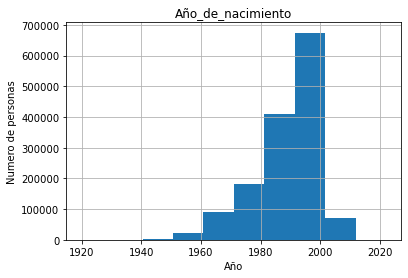

In [100]:
hist= DataBici2.hist(column='Año_de_nacimiento')
for axis in hist.flatten():
    axis.set_xlabel("Año")
    axis.set_ylabel("Numero de personas")

A través de la columna *`ID Origen`* del **DataFrame**, determinar el valor de la *moda* para con ello definir la Estación de origen más utilizada, ey se imprime el número de ID de dicha estación. 

***Nota:*** Una alternativa sencilla es emplear el método `.mode()[0]` de **Pandas**.

In [101]:
moda= DataBici2['Origen_Id'].mode().iat[0]
print("El ID de la estacion de origen mas visitada es:",moda)

El ID de la estacion de origen mas visitada es: 51


A través de la columna *`ID Destino`* del **DataFrame**, se determina el valor de la *moda* para con ello definir la Estación de destino más utilizada, y se imprime el número de ID de dicha estación. 


In [102]:
modaD= DataBici2['Destino_Id'].mode().iat[0]
print("El ID de la estacion de destino mas visitada es:",int(modaD))

El ID de la estacion de destino mas visitada es: 51


Para identificar las Estaciones de origen y destino, se emplearán los datos del archivo `Estaciones.csv`. Para ello, se deberá realizar la lectura desde el archivo y asignar los datos a un nuevo **DataFrame**, cuyo **Indice** se debe definir por la columna *`ID`* y posteriormente mostrar su contenido con el método `.head()`.

In [103]:
Estaciones=pd.read_csv(f'./Datos/Estaciones.csv')
Estaciones = Estaciones.set_index('ID').sort_index()
print(Estaciones.head())


                            Nombre de la Estación ID Estación  \
ID                                                              
2   (GDL-001) C. Epigmenio Glez./ Av. 16 de Sept.     GDL-001   
3      (GDL-002) C. Colonias  / Av.  Niños Héroes     GDL-002   
4           (GDL-003) C. Vidrio / Av. Chapultepec     GDL-003   
5            (GDL-004) C. Ghilardi /C. Miraflores     GDL-004   
6   (GDL-005) C. San Diego /Calzada Independencia     GDL-005   

        Localización    Latitud    Longitud       Estado  
ID                                                        
2   Polígono Central  20.666378 -103.348820  En Servicio  
3   Polígono Central  20.667228 -103.366000  En Servicio  
4   Polígono Central  20.667690 -103.368252  En Servicio  
5   Polígono Central  20.691750 -103.362550  En Servicio  
6   Polígono Central  20.681151 -103.338863  En Servicio  


Para este caso la estacion mas visitada tanto de origen como destino es la numero 51, con el siguiente print podemos obtener dicha estacion:

In [110]:
print(Estaciones.loc[51])


Nombre de la Estación    (GDL-049) Lopez Cotilla/ Marcos Castellanos
ID Estación                                                  GDL-049
Localización                                        Polígono Central
Latitud                                                    20.674087
Longitud                                                  -103.35632
Estado                                                   En Servicio
Name: 51, dtype: object


### Otro ejemplo practico
#### Para este ejemplo se supone que se quiere ver el numero total de viajes por usuario, se realizarán tres acciones:
- **a)** Crear una nueva columna de nombre *`Viaje`* la cual contendrá solamente valores iguales a 1.
- **b)** Crear un nuevo **DataFrame** donde se copien las columnas *`Género`* (en este caso usaremos genero para la estadistica pero puede ser cual quier otra columna) y *`Viaje`*. Debido a que la columna *`ID Usuario`* es el índice, será parte del nuevo **DataFrame** también.
- **c)** Agrupar este nuevo **DataFrame** por medio de las columnas *`Género`* y *`ID Usuario`* empleando el método `.groupby()`, agregando el método que realiza la suma de los valores `.sum()` el cual mostrará la cantidad de viajes de cada usuario.

In [106]:
# a)
DataBici2['Viaje']=1
DataBici2
#b)
DataBici3=DataBici2[['Genero','Viaje']].copy()
DataBici3
#C)  
DataBici3.groupby(['Usuario_Id','Genero'])['Viaje'].sum().to_frame()

<ipython-input-106-f386c0318987>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataBici2['Viaje']=1


,,Viaje
Usuario_Id,Genero,
102,M,17
237,M,314
264,M,129
272,M,58
275,M,16
...,...,...
2423363,F,3
2423446,M,1
2423451,F,4
